In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#讀取資料
df = pd.read_csv("df_combine.csv")
df["date"] = pd.to_datetime(df["date"] )
df.set_index('date', inplace=True)

In [8]:
#移除object的欄位
df_dtypes = pd.DataFrame(df.dtypes)
df_dtypes.reset_index(drop=False,inplace=True)
df_dtypes.rename(columns={"index":"colnames",0:"type"},inplace=True)
col_select = list(df_dtypes.loc[df_dtypes["type"]!="object","colnames"])
df = df[col_select] 


Accuracy: 0.995475113122172
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       186
           1       0.97      1.00      0.99        35

    accuracy                           1.00       221
   macro avg       0.99      1.00      0.99       221
weighted avg       1.00      1.00      1.00       221



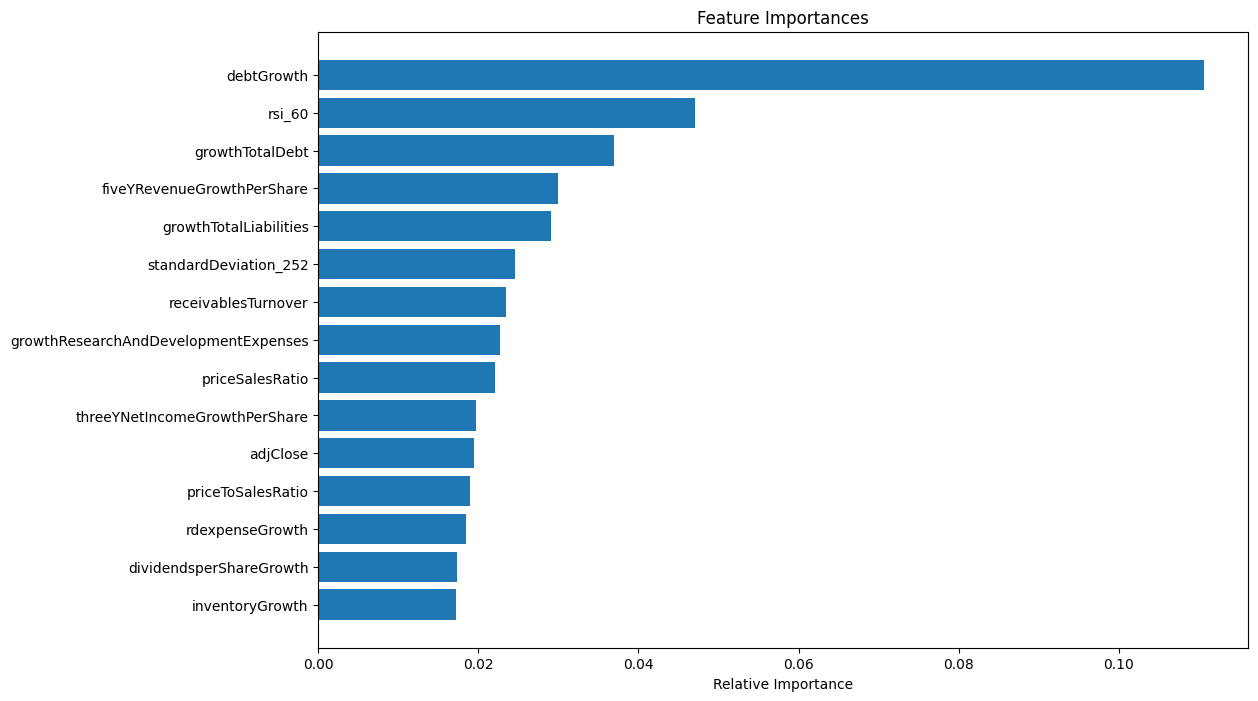

In [12]:

# 準備特徵以及目標 X為特徵變數矩陣 y為我們的目標(90天後的價格是否有超過10%)
X = df.drop(columns=['target'])
y = df['target']

# 切割訓練以及測試資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 建立model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練資料
rf_model.fit(X_train, y_train)

# 預測
y_pred = rf_model.predict(X_test)

# 模型評估
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 找出重要變數
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]  # 列出前15個

# 畫出重要變數圖
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [15]:
print([X.columns[i] for i in indices]) #random froest所找出的重要變數

['inventoryGrowth', 'dividendsperShareGrowth', 'rdexpenseGrowth', 'priceToSalesRatio', 'adjClose', 'threeYNetIncomeGrowthPerShare', 'priceSalesRatio', 'growthResearchAndDevelopmentExpenses', 'receivablesTurnover', 'standardDeviation_252', 'growthTotalLiabilities', 'fiveYRevenueGrowthPerShare', 'growthTotalDebt', 'rsi_60', 'debtGrowth']
